In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\kduru\AppData\Local\Temp\ipykernel_7848\1646444665.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv("onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
df.dtypes

Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
latitude                      float64
longitude                     float64
Pin code                        int64
Output                         object
Feedback                       object
Unnamed: 12                    object
dtype: object

In [6]:
df.shape

(388, 13)

In [7]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [8]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [9]:
from pandas.api.types import CategoricalDtype

In [10]:
df['Family size'] = df['Family size'].astype(CategoricalDtype(categories = [1, 2, 3, 4, 5, 6], ordered = True))

In [11]:
df['Family size']

0      4
1      3
2      3
3      6
4      4
      ..
383    2
384    4
385    5
386    2
387    5
Name: Family size, Length: 388, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

<Axes: ylabel='Family size'>

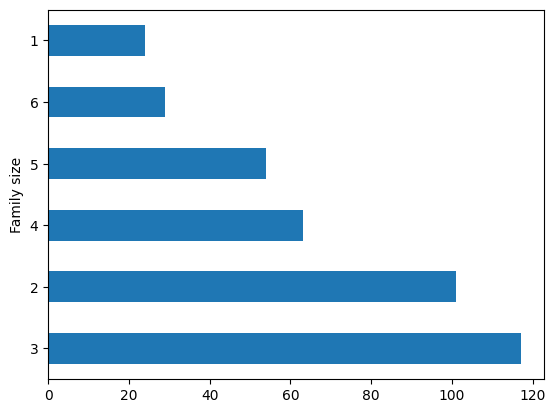

In [12]:
df['Family size'].value_counts().plot.barh()

In [13]:
import seaborn as sns

C:\Users\kduru\AppData\Local\Temp\ipykernel_7848\3935625020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby(['Family size', 'Marital Status']).size().reset_index(name='Count')


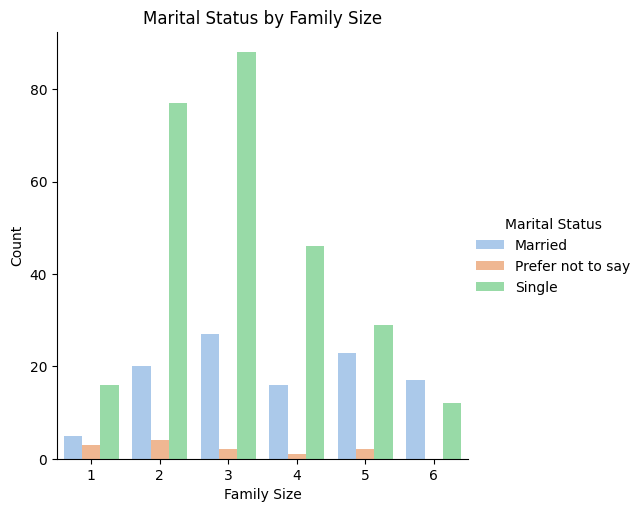

In [14]:
count_df = df.groupby(['Family size', 'Marital Status']).size().reset_index(name='Count')

sns.catplot(data=count_df, kind='bar', x='Family size', y='Count', hue='Marital Status', palette='pastel')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Marital Status by Family Size')
plt.show()

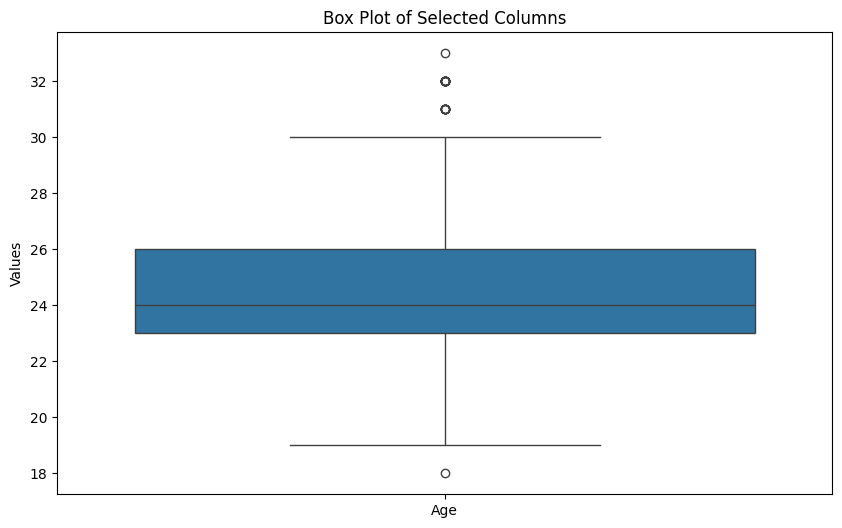

In [15]:
selected_columns = ['Age']

selected_df = df[selected_columns]

# Box plot oluşturalım
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_df)
plt.title('Box Plot of Selected Columns')
plt.ylabel('Values')
plt.show()

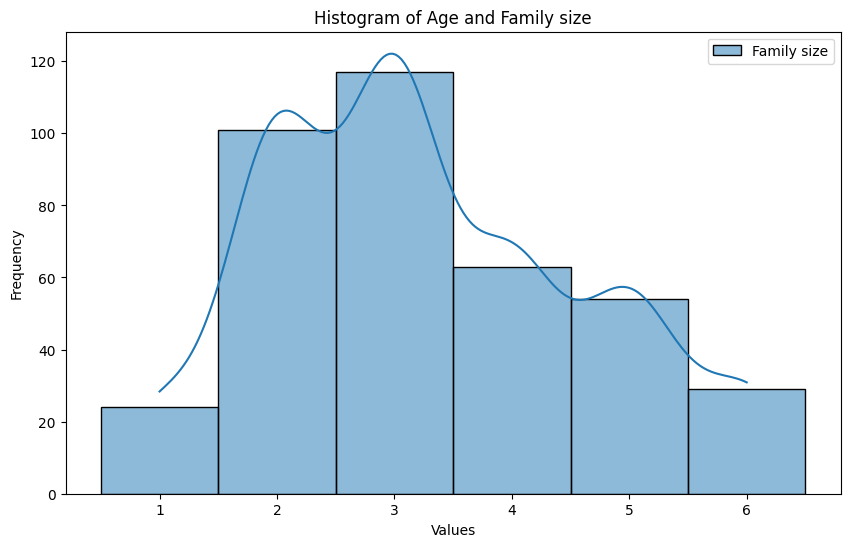

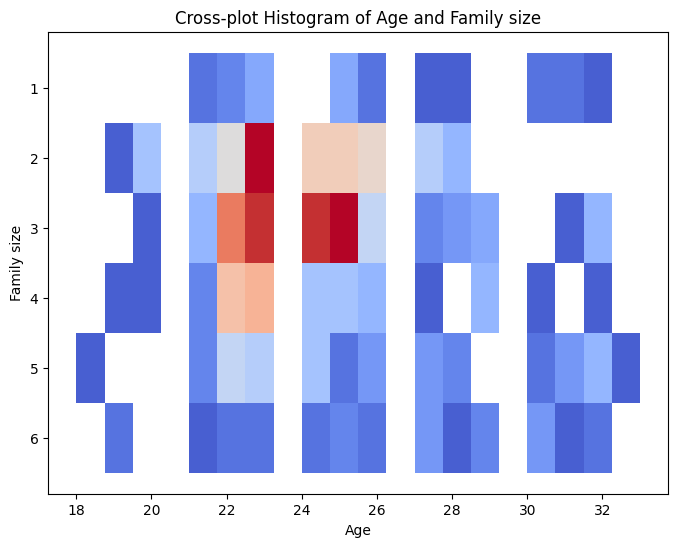

In [16]:
selected_columns = ['Family size']

selected_df = df[selected_columns]

plt.figure(figsize=(10, 6))
for column in selected_columns:
    sns.histplot(selected_df[column], kde=True, alpha=0.5, label=column)
plt.title('Histogram of Age and Family size')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', y='Family size', bins=20, cmap='coolwarm')
plt.title('Cross-plot Histogram of Age and Family size')
plt.xlabel('Age')
plt.ylabel('Family size')
plt.show()

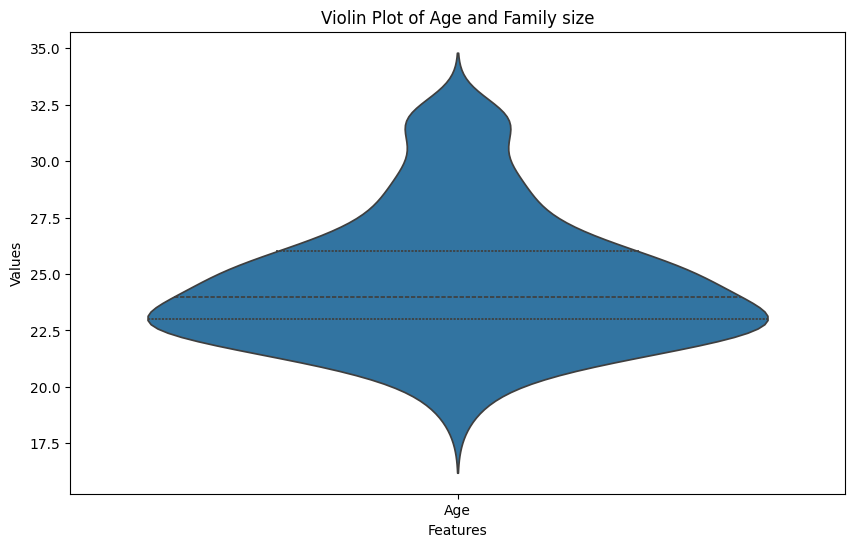

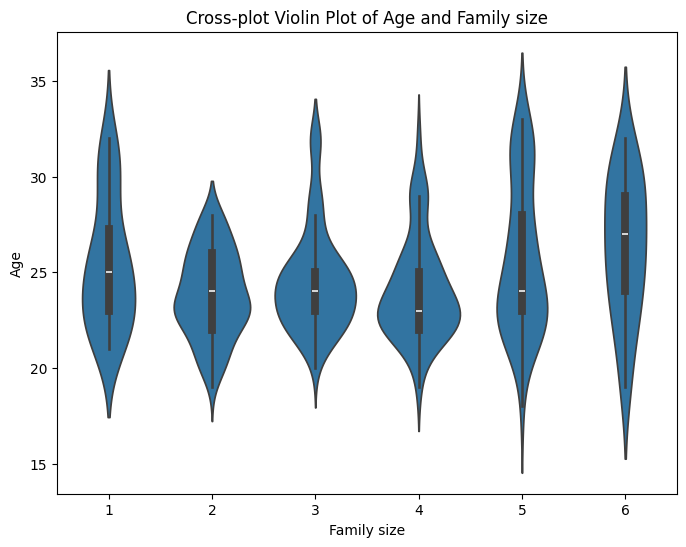

In [17]:
selected_columns = ['Age', 'Family size']

# Seçilen sütunları içeren bir alt veri çerçevesi oluşturalım
selected_df = df[selected_columns]

plt.figure(figsize=(10, 6))
sns.violinplot(data=selected_df, inner='quartile')
plt.title('Violin Plot of Age and Family size')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Family size', y='Age')
plt.title('Cross-plot Violin Plot of Age and Family size')
plt.xlabel('Family size')
plt.ylabel('Age')
plt.show()

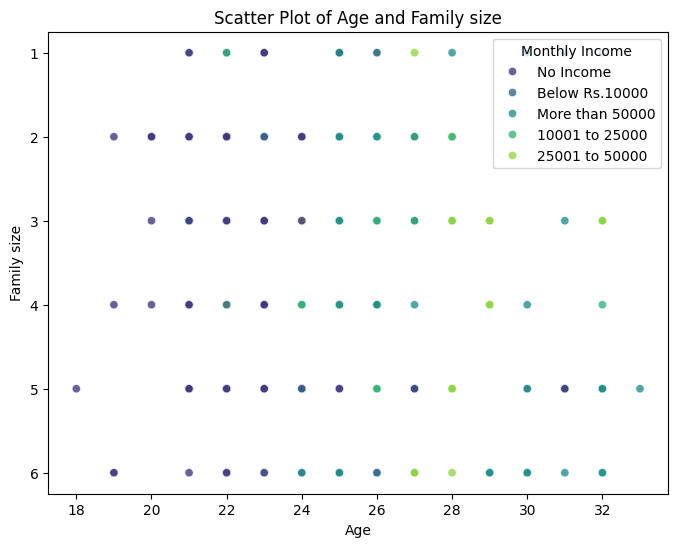

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Family size', hue='Monthly Income', palette='viridis', alpha=0.8)
plt.title('Scatter Plot of Age and Family size')
plt.xlabel('Age')
plt.ylabel('Family size')
plt.legend(title='Monthly Income')
plt.show()

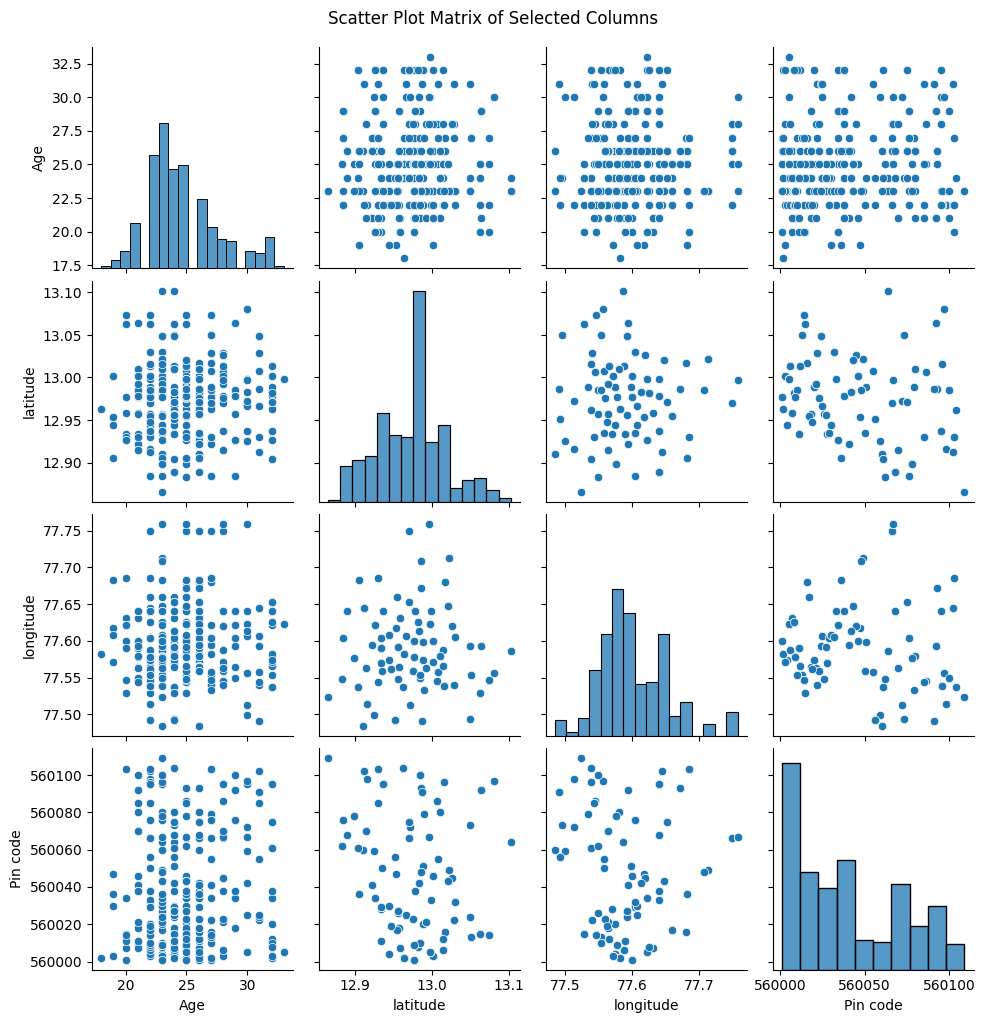

In [19]:
selected_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
selected_df = df[selected_columns]

sns.pairplot(selected_df)
plt.suptitle('Scatter Plot Matrix of Selected Columns', y=1.02)
plt.show()

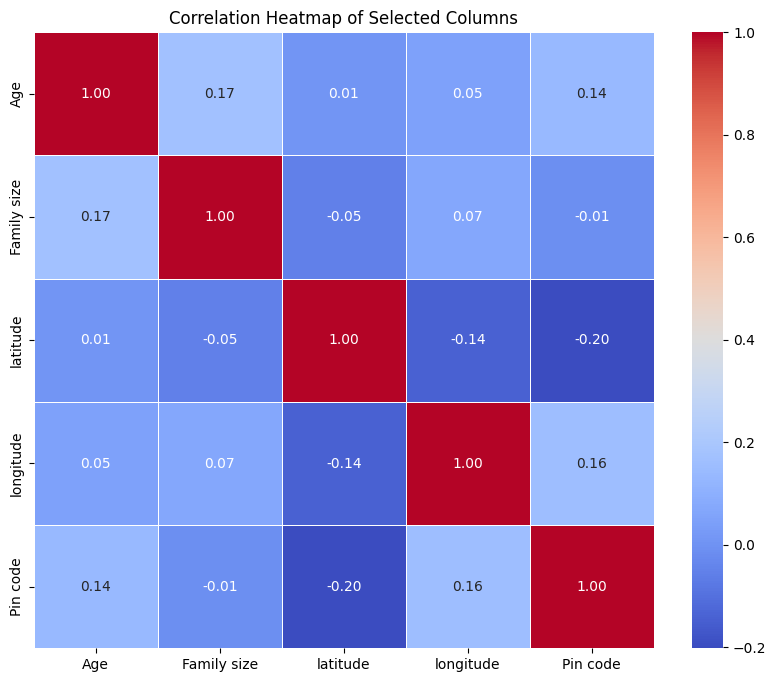

In [20]:
selected_columns = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
selected_df = df[selected_columns]

# Korelasyon matrisini hesaplayalım
correlation_matrix = selected_df.corr()

# Heatmap grafiği
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

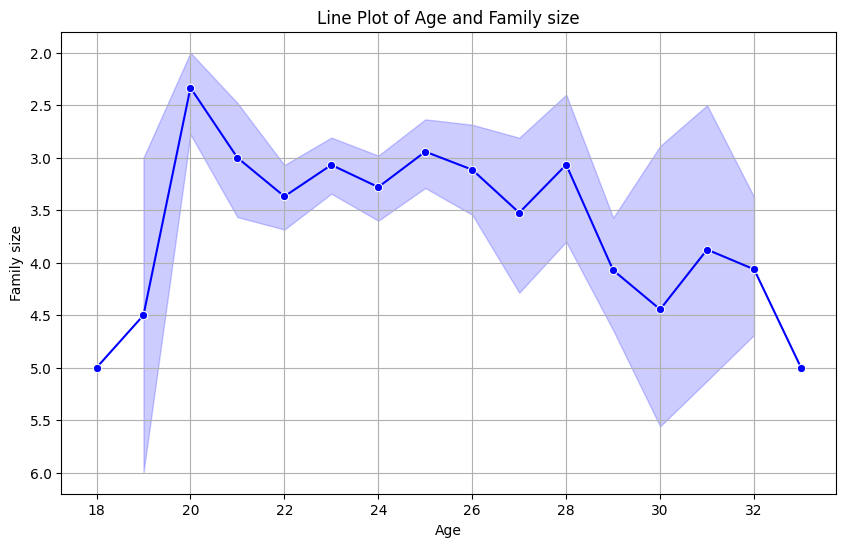

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='Family size', marker='o', color='blue')
plt.title('Line Plot of Age and Family size')
plt.xlabel('Age')
plt.ylabel('Family size')
plt.grid(True)
plt.show()
